# Fuzzy logic task

Define a fuzzy controller for a distance to stop system for cars.

Also define the functions for each input, e. g. $$f_{light}(x) = min(2x, 1)$$
Write everything with Python code and visualize your results!
You can alternatively visualize it on paper.
Use center of gravity to calculate the final result.

The following information is provided:

## Inputs

### 1. Speed of vehicle
#### Set of terms
- slow
- medium
- fast


The terms are in range [0, 100]

### 2. (Own) Car weight

#### Set of terms
- light
- medium
- heavy

The terms are in range [0, 100]

## Output

## Distance to full stop

#### Set of terms
- very low
- low
- medium
- high
- very high 

The terms are in range [0, 3] ($\times$10meters)

## Inference rules

| Id 	| Speed 	| Car weight 	| Distance 	|
|:---:	|:---:	|:---:	|:---:	|
| 1 	| slow 	| light 	| veryvlow 	|
| 2 	| slow 	| medium 	| low 	|
| 3 	| slow 	| heavy 	| medium 	|
| 4 	| medium 	| light 	| low 	|
| 5 	| medium 	| medium 	| medium 	|
| 6 	| medium 	| heavy 	| high 	|
| 7 	| fast 	| light 	| medium 	|
| 8 	| fast 	| medium 	| high 	|
| 9 	| fast	| heavy 	| very high 	|

## Question

Calculate the distance for

1) Speed = 30

2) Car weight = 60

# Task 2 (Research)

Try out NumPy: [NumPy](https://numpy.org/) [Quickstart](https://numpy.org/devdocs/user/quickstart.html)

Try out Pandas: [Pandas](https://pandas.pydata.org/) [Quickstart](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

Try out SKlearn: [Scikit-learn](https://scikit-learn.org/stable/) [Quickstart](https://scikit-learn.org/stable/getting_started.html)

We will use the packages mentioned above in the next practical sessions. Familiarize yourself with the mentioned packages.

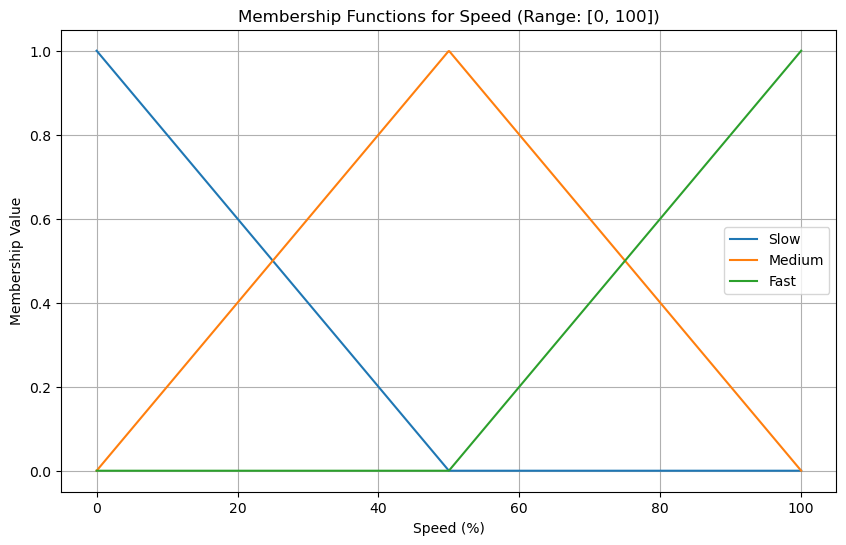

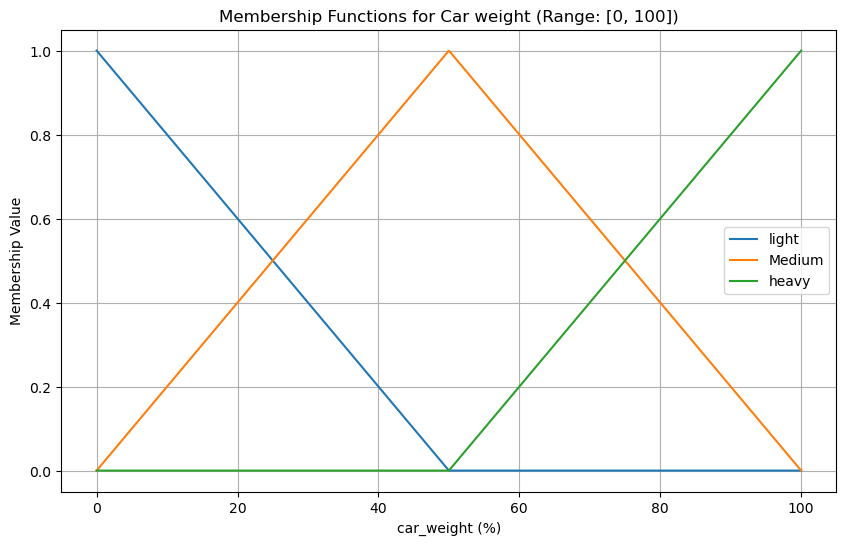

Numerator:  14.592500000000001
Denominator:  10.174999999999992
Center of Gravity (COG): 1.4341523341523355


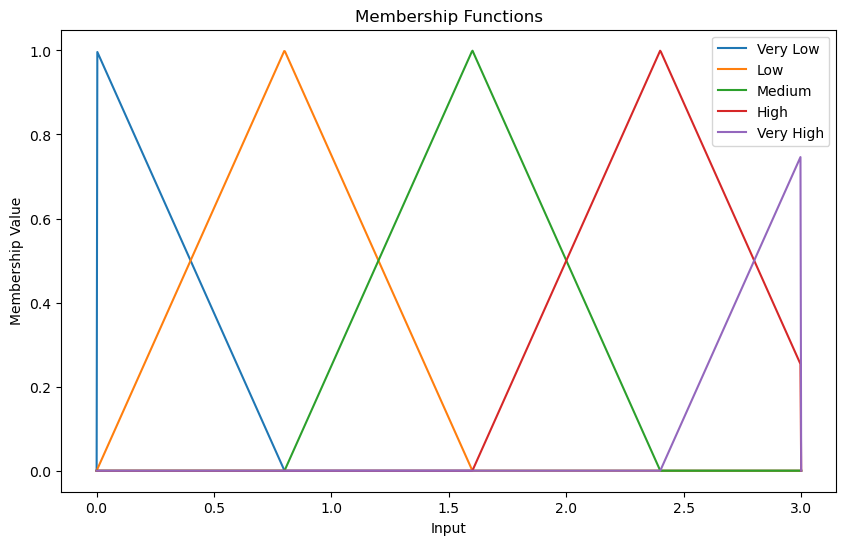

In [98]:

import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define membership functions for speed
def f_speed_slow(x):
    if x <= 50:
        return (50 - x) / 50
    else:
        return 0

def f_speed_medium(x):
    if x <= 50:
        return x / 50
    elif x <= 100:
        return (100 - x) / 50
    else:
        return 0

def f_speed_fast(x):
    if x >= 50 and x <= 100:
        return (x - 50) / 50
    else:
        return 0

# Define membership functions for car weight
def f_weight_light(x):
    if x <= 50:
        return (50 - x) / 50
    else:
        return 0

def f_weight_medium(x):
    if x <= 50:
        return x / 50
    elif x <= 100:
        return (100 - x) / 50
    else:
        return 0

def f_weight_heavy(x):
    if x >= 50 and x <= 100:
        return (x - 50) / 50
    else:
        return 0


# Generate input values for range [0, 100]
x_range_0100 = np.linspace(0, 100, 1000)

# Calculate membership values for range [0, 100]
speed_slow = [f_speed_slow(i) for i in x_range_0100]
speed_medium = [f_speed_medium(i) for i in x_range_0100]
speed_fast = [f_speed_fast(i) for i in x_range_0100]

# Plot membership functions for range [0, 100] for speed
plt.figure(figsize=(10, 6))
plt.plot(x_range_0100, speed_slow, label='Slow')
plt.plot(x_range_0100, speed_medium, label='Medium')
plt.plot(x_range_0100, speed_fast, label='Fast')
plt.title('Membership Functions for Speed (Range: [0, 100])')
plt.xlabel('Speed (%)')
plt.ylabel('Membership Value')
plt.legend()
plt.grid(True)
plt.show()
x_range_0100 = np.linspace(0, 100, 1000)

# Calculate membership values for range [0, 100]
weight_light = [f_weight_light(i) for i in x_range_0100]
weight_medium = [f_weight_medium(i) for i in x_range_0100]
weight_heavy = [f_weight_heavy(i) for i in x_range_0100]

# Plot membership functions for range [0, 100] for car_weight
plt.figure(figsize=(10, 6))
plt.plot(x_range_0100, weight_light, label='light')
plt.plot(x_range_0100, weight_medium, label='Medium')
plt.plot(x_range_0100, weight_heavy, label='heavy')
plt.title('Membership Functions for Car weight (Range: [0, 100])')
plt.xlabel('car_weight (%)')
plt.ylabel('Membership Value')
plt.legend()
plt.grid(True)
plt.show()

x = np.linspace(0, 3, 1000)

# Define membership functions for each term
def f_very_low(x):
    if (x < 0):
        return 0
    elif (x > 0 and x < 0.8):
        return -1.25*x + 1 
    elif (x > 0.8):
        return 0
    else: 
        return 0



def f_low(x):
    if (x < 0):
        return 0
    elif (x > 0 and x < 0.8):
        return 1.25*x 
    elif(x > 0.8 and x < 1.6):
        return -1.25*x + 2
    elif(x > 1.6):
        return 0
    else:
        return 0



def f_medium(x):
    if (x < 0.8):
        return 0
    elif (x > 0.8 and x < 1.6):
        return 1.25*x - 1
    elif(x > 1.6 and x < 2.4):
        return -1.25*x + 3
    elif(x > 2.4):
        return 0
    else:
        return 0



def f_high(x):
    if (x < 1.6):
        return 0
    elif (x > 1.6 and x < 2.4):
        return 1.25*x - 2
    elif(x > 2 and x < 3):
        return -1.25*x + 4
    elif(x > 3):
        return 0
    else:
        return 0



def f_very_high(x):
    if (x < 2.4):
        return 0
    elif (x > 2.4 and x < 3):
        return 1.25*x - 3
    elif (x > 3):
        return 0
    else: 
        return 0


# Visualize the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x, [f_very_low(_x) for _x in x], label='Very Low')
plt.plot(x, [f_low(_x) for _x in x], label='Low')
plt.plot(x, [f_medium(_x) for _x in x], label='Medium')
plt.plot(x, [f_high(_x) for _x in x], label='High')
plt.plot(x, [f_very_high(_x) for _x in x], label='Very High')
plt.title('Membership Functions')
plt.xlabel('Input')
plt.ylabel('Membership Value')
plt.legend()
plt



def calculate_membership(speed, car_weight):    
    speed_names = []
    if speed <= 50:
        speed_names.append("slow")
        speed_names.append("medium")
    elif speed > 50:
        speed_names.append("medium")
        speed_names.append("fast")
    elif speed == 100:
        speed_names.append("fast")
    elif speed == 50:
        speed_names.append("medium")
    else:
        speed_names.append("slow")

    car_weight_names = []
    if car_weight <= 50:
        car_weight_names.append("light")
        car_weight_names.append("medium")
    elif car_weight > 50:
        car_weight_names.append("medium")
        car_weight_names.append("heavy")
    elif car_weight == 100:
        car_weight_names.append("heavy")
    elif car_weight == 50:
        car_weight_names.append("medium")
    else:
        car_weight_names.append("light")

    

    #making combinations of the distances and the car weights
    memberships = []
    speed_labels = ["slow", "medium", "fast"]
    weight_labels = ["light", "medium", "heavy"]

    for r in itertools.product(speed_names, car_weight_names):
        speed_membership = globals()['f_speed_' + r[0]]
        weight_membership = globals()['f_weight_' + r[1]]
        distance = min(speed_membership(speed), weight_membership(car_weight))
        memberships.append((r[0], r[1], distance))
        

    #Application of the inference rules and the result represented as a tuple
    distance_names = []
    for m in memberships:
        if m[0] == "slow":
            if m[1] == "light":
                distance_names.append(("very low", m[2]))
            elif m[1] == "medium":
                distance_names.append(("low", m[2]))
            elif m[1] == "heavy":
                distance_names.append(("medium", m[2]))
        elif m[0] == "medium":
            if m[1] == "light":
                distance_names.append(("low",m[2]))
            elif m[1] == "medium":
                distance_names.append(("medium", m[2]))
            elif m[1] == "heavy":
                distance_names.append(("high", m[2]))
        elif m[0] == "fast":
            if m[1] == "light":
                distance_names.append(("medium", m[2]))
            elif m[1] == "medium":
                distance_names.append(("high", m[2]))
            elif m[1] == "heavy":
                distance_names.append(("very high", m[2]))

    return distance_names, memberships


memberships, distance_names = calculate_membership(speed, car_weight)


#y-value for each of the distance categories as lists
vals_very_low = [min(0, f_very_low(x / 10)) for x in range(0, 31)]
vals_low = [min(0.4, f_low(x / 10)) for x in range(0, 31)]
vals_medium = [min(0.6, f_medium(x / 10)) for x in range(0, 31)]
vals_high = [min(0.2, f_high(x / 10)) for x in range(0, 31)]
vals_very_high = [min(0, f_very_high(x / 10)) for x in range(0, 31)]

#Temporary list that contains all the max values 
x_values = [x/10 for x in range(0,31)]
temp_list = []
for i in range(0,31):
    temp_list.append(max(vals_very_low[i],vals_low[i],vals_medium[i],vals_high[i],vals_very_high[i]))
    

#CoG calculatiom
numerator = sum(temp * x for temp, x in zip(temp_list, x_values))
print("Numerator: ", numerator)

denominator = sum(temp_list)
print("Denominator: ", denominator)

cog = numerator / denominator
print("Center of Gravity (COG):", cog)





    

